# Data Exploration


First we imported the data from our data collection notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from altair import *
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

final = pd.read_csv("~/data301/share/Brooke_Michal/final_data.csv")
final.head()

,Country,Country Code,1990_P,1997_P,1998_P,1999_P,2000_P,2001_P,2002_P,2003_P,...,2016_M,latest_value_M,Government Type,Religion,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Birthrate,Deathrate
0,Afghanistan,AFG,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Republic,Muslims,48.0,163.07,700.0,36.0,46.60,20.34
1,Angola,AGO,14.5,9.5,15.5,15.5,15.5,15.5,15.5,15.5,...,NaN,NaN,Republic,Christians,9.7,191.19,1900.0,42.0,45.11,24.20
2,Albania,ALB,28.8,NaN,NaN,5.2,5.2,5.7,5.7,5.7,...,NaN,22.47,Republic,Muslims,124.6,21.52,4500.0,86.5,15.11,5.22
3,Andorra,AND,NaN,7.1,7.1,7.1,7.1,14.3,14.3,14.3,...,NaN,NaN,Constitutional Monarchy,Christians,152.1,4.05,19000.0,100.0,8.71,6.25
4,United Arab Emirates,ARE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,Absolute Monarchy,Muslims,31.4,14.51,23200.0,77.9,18.96,4.40


We created a row in the data frame to represent the numeric data for all countries(using NaN for categorical variables) and then appended this row to the final data frame. We filled in this row with the mean of each column because all columns were either a percentage or a proportion, so the mean was the most appropriate statistic to represent each column for all countries

In [2]:
final["Pop. Density (per sq. mi.)"] = final["Pop. Density (per sq. mi.)"].astype(float)
final.loc[:,"1990_P":"2018_P"]
total = pd.Series(final.mean())
df = pd.DataFrame(total).transpose()
df["Country"] = "Total"
df["Government Type"] = "Nan"
df["Religion"] = "Nan"
df["Country Code"] = "Nan"
df["Region"] = "Nan"
df["IncomeGroup"] = "Nan"
final_df = pd.concat([final, df])
final_df = final_df.set_index("Country")
final_df.tail()

,1990_P,1997_P,1998_P,1999_P,2000_M,2000_P,2001_M,2001_P,2002_M,2002_P,...,Deathrate,GDP ($ per capita),Government Type,IncomeGroup,Infant mortality (per 1000 births),Literacy (%),Pop. Density (per sq. mi.),Region,Religion,latest_value_M
Country,,,,,,,,,,,,,,,,,,,,,
Samoa,0.000000,4.100000,4.100000,8.200000,NaN,8.200000,NaN,6.100000,NaN,6.100000,...,6.620000,5600.000000,Republic,Upper middle income,27.710000,99.700000,60.100000,East Asia & Pacific,Christians,41.630000
South Africa,2.800000,25.000000,28.800000,30.000000,NaN,29.800000,NaN,29.800000,NaN,29.800000,...,22.000000,10700.000000,Republic,Upper middle income,61.810000,86.400000,36.200000,Sub-Saharan Africa,Christians,29.740000
Zambia,6.600000,9.700000,10.300000,10.100000,NaN,10.100000,NaN,10.100000,NaN,12.000000,...,19.930000,800.000000,Republic,Lower middle income,88.290000,80.600000,15.300000,Sub-Saharan Africa,Christians,NaN
Zimbabwe,11.000000,14.700000,14.700000,14.000000,NaN,9.300000,NaN,10.000000,NaN,10.000000,...,21.840000,1900.000000,Republic,Low income,67.690000,90.700000,31.300000,Sub-Saharan Africa,Christians,NaN
Total,9.917557,10.479085,11.101961,11.514583,27.616667,11.985906,30.124074,12.374684,28.9,13.734868,...,9.705028,8950.555556,Nan,Nan,39.293278,81.635057,279.863333,Nan,Nan,31.073947


**How are managment and parliament related?**

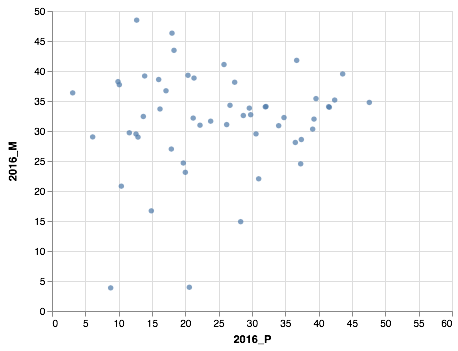

In [3]:
Chart(final_df).mark_circle(clip=True).encode(
    x=X("2016_P", scale=Scale(domain=(0, 60))),
    y=Y("2016_M",scale=Scale(domain=(0, 50)))
)


The graph above represents the relationship between women in management and women in government, where each dot represents a country(only countries that had values for each varible appear on the plot). The scatter plot releaves that there is not a strong association between these varibels. This was suprising to us, so we wanted to also look at how these variables are related in total, using our new observation in the data set that represents the world. 

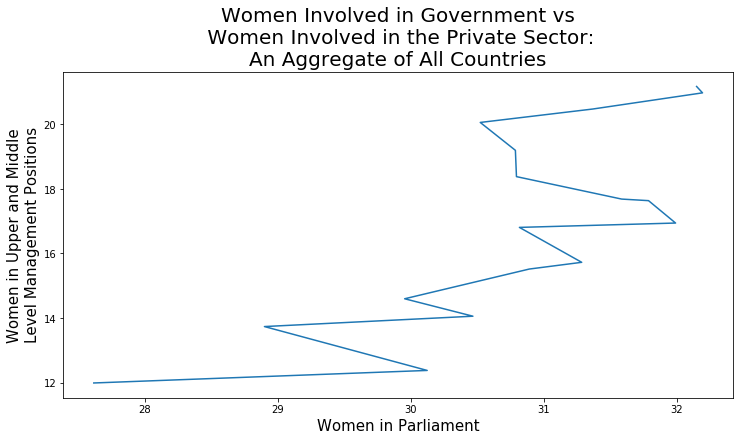

In [4]:
dfnew = df.loc[:,"2000_P":"2016_P"].stack()
pdf = pd.DataFrame(dfnew)
dfnew2 = df.loc[:,"2000_M":"2016_M"].stack()
mdf = pd.DataFrame(dfnew2)

plt.plot(mdf, pdf)
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(12,6)
ax.set_ylabel("Women in Upper and Middle\n"
              "Level Management Positions", size = 15)
ax.set_xlabel("Women in Parliament", size = 15)
plt.title("Women Involved in Government vs\n "
          "Women Involved in the Private Sector:\n"
          "An Aggregate of All Countries", size= 20)
for txt in fig.texts:
    txt.set_visible(False)

This graph shows that on average, there is a positive, linear assosiation between women in management and women in government. There is, however, lots of spikes in the graph, which could explain the weakness in the scatterplot. We hypothessize these spikes come from the changing climates of various countries, which affects the world as a whole at any given time. 

**What is the relationship between all of our variables?**

In [5]:
final_df[['Government Type','Religion', 'Infant mortality (per 1000 births)', 
 'Literacy (%)','Birthrate', 'Deathrate', "2016_P", "2016_M"]].corr()

,Infant mortality (per 1000 births),Literacy (%),Birthrate,Deathrate,2016_P,2016_M
Infant mortality (per 1000 births),1.000000,-0.757672,0.810046,0.653949,-0.068103,-0.373122
Literacy (%),-0.757672,1.000000,-0.790076,-0.372344,0.141244,0.434911
Birthrate,0.810046,-0.790076,1.000000,0.378259,-0.154438,-0.231179
Deathrate,0.653949,-0.372344,0.378259,1.000000,0.110583,-0.112638
2016_P,-0.068103,0.141244,-0.154438,0.110583,1.000000,0.097233
2016_M,-0.373122,0.434911,-0.231179,-0.112638,0.097233,1.000000


In [6]:
final_df["2016_P"].corr(final_df["2016_M"])

0.097232753596663335

We wanted to highlight the correlation between women in managemnt and parliament since we investigated this relationship in the above graphs. The correlation is very weak, which corresponds to what we saw in the grpahs above. This was actually the weakest relationship between any two variables. Now we are interested to see how these other variables affect women in maganement and government.

**What is the relationship between the proportion women in managment and parliament, by religion of country?**

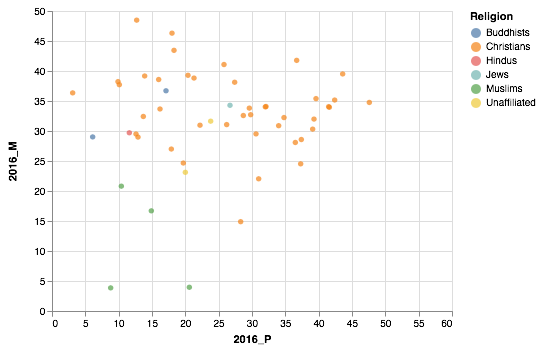

In [7]:
Chart(final_df[final_df["Religion"] != "Nan"]).mark_circle(clip=True).encode(
    x=X("2016_P", scale=Scale(domain=(0, 60))),
    y=Y("2016_M",scale=Scale(domain=(0, 50))),
    color="Religion"
)

This scatter plot shows how religion affects the relationship between women in management and women in parliament. We can see that the countries with the highest proportion of women in parliament are Christian countries and the countries with the lowest proportion of women in government are Muslim and Buddhist countries. This gives us preliminary evidence that relgion may be a useful feature in our model.

**What is the relationship between the proportion women in managment and parliament, by government type of country?**

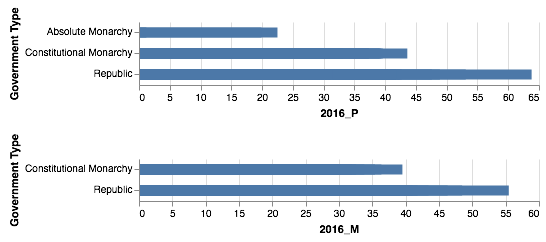

In [8]:
gov_df = final_df[(
    final_df["Government Type"] == 'Constitutional Monarchy') | 
    (final_df["Government Type"] == "Absolute Monarchy") |
    (final_df["Government Type"] == "Republic")]
parliament = Chart(gov_df).mark_bar(size=10).encode(
    y="Government Type",
    x="2016_P"
)
management = Chart(gov_df).mark_bar(size=10).encode(
    y="Government Type",
    x="2016_M",
)
vconcat(parliament, management).configure_view(stroke='transparent')

This grpahs shows us how government type of a country effects women's roles in the country. Republics have the most women in both management and government, then constiutuional monarchies. Absolute monarchies have the least women in parliament and had no data for how many women are in management. It is a posibility that this information on women in management posiitons is missing because absolute monarchies tend to have strict government policies and may have chosen not to relase this information. Therefore, we want to investigate the completeness the managment data further. 

In [9]:
(len(final),
 len(final[final["2016_M"].isna()]), 
 len(final[final["latest_value_M"].isna()]),
 len(final[final["2018_P"].isna()]))

(180, 127, 104, 1)

Looking at these numbers, we can see that out of 180 countries 127 of them have no information about women in managment in 2016 (the last year available in this data set). We see that using the latest value of managment is slightly better than just using the year 2016, but still has an overwhelming majority of countries missing informaiton (104 missing instead of 127). Furthermore, the numbers reveal that we have no zeros in the managemnt data set. The parliament data set; however, only has one country with a missing value in 2018, which makes us want to focus our exploration on parliament instead of managment. 

**We wanted to investigate the countries with the highest and lowest proportion of women in parliament to try to understand which factors contribute to this statistic.**

In [10]:
top_5 = list(final_df["2018_P"].sort_values(ascending = False).head(5).index)
top_5_df = final_df.loc[top_5]
top_5_df["2018_P"]

Country
Rwanda     61.3
Cuba       53.2
Bolivia    53.1
Mexico     48.2
Grenada    46.7
Name: 2018_P, dtype: float64

In [11]:
top_5_df

,1990_P,1997_P,1998_P,1999_P,2000_M,2000_P,2001_M,2001_P,2002_M,2002_P,...,Deathrate,GDP ($ per capita),Government Type,IncomeGroup,Infant mortality (per 1000 births),Literacy (%),Pop. Density (per sq. mi.),Region,Religion,latest_value_M
Country,,,,,,,,,,,,,,,,,,,,,
Rwanda,17.1,17.1,17.1,17.1,NaN,25.7,NaN,25.7,NaN,25.7,...,16.09,1300.0,Republic,Low income,91.23,70.4,328.4,Sub-Saharan Africa,Christians,NaN
Cuba,33.9,22.8,27.6,27.6,NaN,27.6,NaN,27.6,NaN,27.6,...,7.22,2900.0,Republic,Upper middle income,6.33,97.0,102.7,Latin America & Caribbean,Christians,NaN
Bolivia,9.2,NaN,NaN,11.5,NaN,11.5,NaN,11.5,NaN,18.5,...,7.53,2400.0,Republic,Lower middle income,53.11,87.2,8.2,Latin America & Caribbean,Christians,NaN
Mexico,12.0,14.2,17.4,18.2,NaN,16.0,NaN,16.0,NaN,16.0,...,4.74,9000.0,Republic,Upper middle income,20.91,92.2,54.5,Latin America & Caribbean,Christians,35.16
Grenada,NaN,20.0,20.0,NaN,NaN,26.7,NaN,26.7,NaN,26.7,...,6.88,5000.0,Constitutional Monarchy,Upper middle income,14.62,98.0,260.8,Latin America & Caribbean,Christians,NaN


In [12]:
get_bottom = final_df[~final_df["2018_P"].isna()]
bottom_5 = list(get_bottom["2018_P"].sort_values().head(5).index)
bottom_5_df = final_df.loc[bottom_5]
bottom_5_df["2018_P"]

Country
Papua New Guinea    0.0
Vanuatu             0.0
Oman                1.2
Haiti               2.5
Kuwait              3.1
Name: 2018_P, dtype: float64

In [13]:
bottom_5_df

,1990_P,1997_P,1998_P,1999_P,2000_M,2000_P,2001_M,2001_P,2002_M,2002_P,...,Deathrate,GDP ($ per capita),Government Type,IncomeGroup,Infant mortality (per 1000 births),Literacy (%),Pop. Density (per sq. mi.),Region,Religion,latest_value_M
Country,,,,,,,,,,,,,,,,,,,,,
Papua New Guinea,0.0,1.8,1.8,1.8,NaN,1.8,NaN,1.8,NaN,NaN,...,7.25,2200.0,Constitutional Monarchy,Lower middle income,51.45,64.6,12.3,East Asia & Pacific,Christians,NaN
Vanuatu,4.3,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.9,...,7.82,2900.0,Republic,Lower middle income,55.16,53.0,17.1,East Asia & Pacific,Christians,NaN
Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.81,13100.0,Absolute Monarchy,High income,19.51,75.8,14.6,Middle East & North Africa,Muslims,NaN
Haiti,NaN,3.6,3.6,3.6,NaN,NaN,NaN,3.6,NaN,3.6,...,12.17,1600.0,Republic,Low income,73.45,52.9,299.4,Latin America & Caribbean,Christians,NaN
Kuwait,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,2.41,19000.0,Constitutional Monarchy,High income,9.95,83.5,135.7,Middle East & North Africa,Muslims,NaN


In [14]:
title = 'of Countries with Most and Least Women in National Parliament'
label_least='Countries with Least Women in Parliament'
label_most='Countries with Most Women in Parliament'

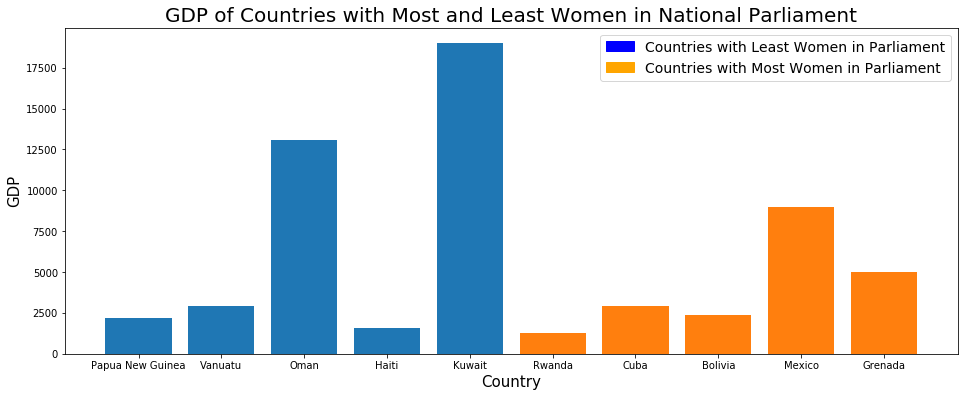

In [15]:
plt.bar(bottom_5_df.index, bottom_5_df["GDP ($ per capita)"])
plt.bar(top_5_df.index, top_5_df["GDP ($ per capita)"])

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(16,6)
ax.set_ylabel("GDP", size = 15)
ax.set_xlabel("Country", size = 15)
plt.title("GDP " + title, size= 20)
blue_patch = mpatches.Patch(color='blue', label=label_least)
o_patch = mpatches.Patch(color='orange', label=label_most)
plt.legend(handles=[blue_patch, o_patch], fontsize=14)

plt.show()

This graph is interesting because intitally we thought that the counties with the least women in parliament would have low GDP. However, this graph reveals that indivual climates of countries is very important. For example, Oman and Kuwait are both middle eastern countries and have very high GDP because of their oil weath but are also muslim countries which explains why they have less women in government. 

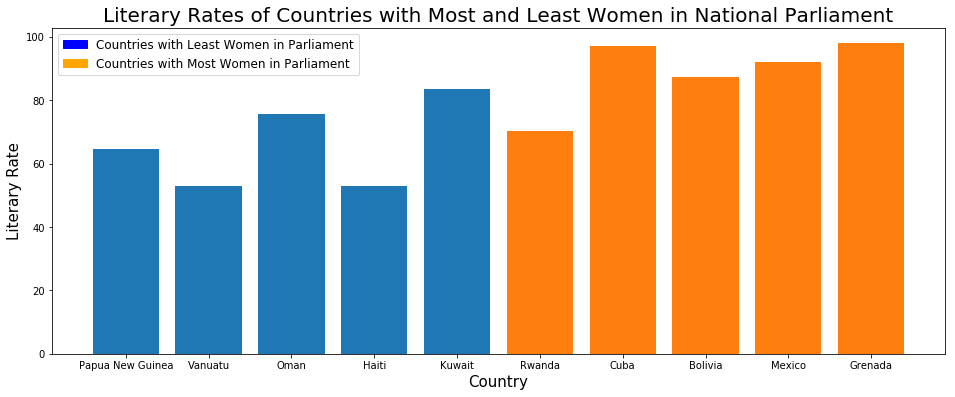

In [16]:
plt.bar(bottom_5_df.index, bottom_5_df["Literacy (%)"])
plt.bar(top_5_df.index, top_5_df["Literacy (%)"])

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(16,6)
ax.set_ylabel("Literary Rate", size = 15)
ax.set_xlabel("Country", size = 15)
plt.title("Literary Rates " + title, size= 20)
blue_patch = mpatches.Patch(color='blue', label=label_least)
o_patch = mpatches.Patch(color='orange', label=label_most)
plt.legend(handles=[blue_patch, o_patch], fontsize=12)

plt.show()

While there is a fair amount of vairation in the plot above, it does show that on average, the countries with higher literacy rates have a higher proportion of women in government. 

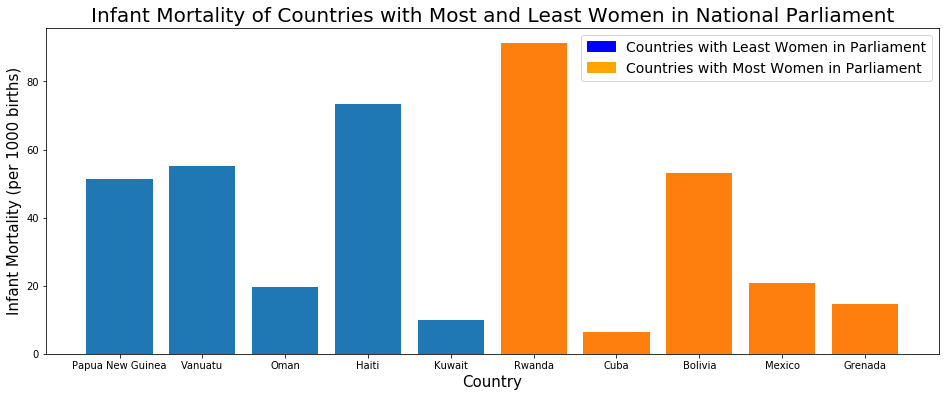

In [17]:
plt.bar(bottom_5_df.index, bottom_5_df["Infant mortality (per 1000 births)"])
plt.bar(top_5_df.index, top_5_df["Infant mortality (per 1000 births)"])

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(16,6)
ax.set_ylabel("Infant Mortality (per 1000 births)", size = 15)
ax.set_xlabel("Country", size = 15)
plt.title("Infant Mortality " + title, size= 20)
blue_patch = mpatches.Patch(color='blue', label=label_least)
o_patch = mpatches.Patch(color='orange', label=label_most)
plt.legend(handles=[blue_patch, o_patch], fontsize=14)

plt.show()

Overall, the above three bar plots have a lot of variation and did not give us as much insight into which factors contribute to countries having the largest and smallest proportion of women in government. What these graphs did show is that the individual climate of a country is very influential in its demogrpahics and the proportion of women in government. For example, in the graph above we see that Rwanda has a very high infant morality rate as well as being a leading country for women in parliament. This tells us that Rwanda is a more progressive country, in terms of gender equality, but is still struggling to combat health epidemics which led to a very high infant mortality. 

**How does the U.S compare to the leading 5 countries for proportion of women in parliament?**

In [18]:
final_df = final_df.reset_index()

In [19]:
us = final_df[final_df["Country"] == "United States"].set_index("Country")

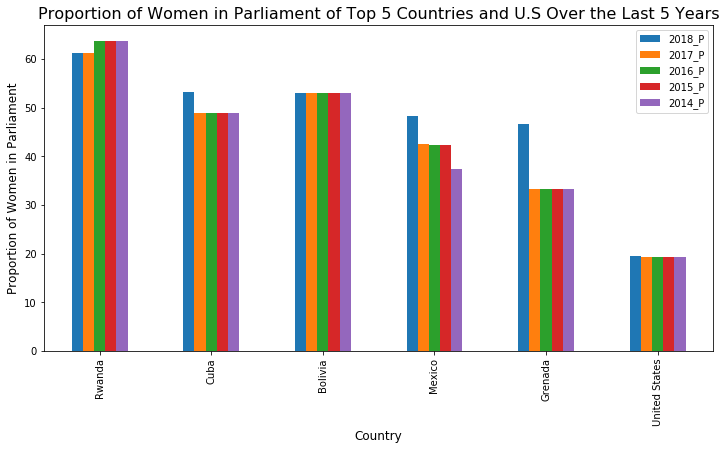

In [20]:
top_and_us = pd.concat([top_5_df, us])
fig = top_and_us[["2018_P", "2017_P", "2016_P", "2015_P", "2014_P"]].plot.bar(
    figsize = (12, 6))
plt.title("Proportion of Women in Parliament of Top 5 Countries and U.S Over the Last 5 Years", size=16)
fig.set_xlabel("Country", size=12)
fig.set_ylabel("Proportion of Women in Parliament", size=12)
for txt in fig.texts:
    txt.set_visible(False)

The graph above gives us insight into the trend countries have followed in the last 5 years for women involvment in government. Specifically, the U.S. has had its first slight increase in 2018, but overall has barely changed. However; Cuba, Mexico, and Grenada have made significant increases over the last 5 years. The other two countries already had equal representation in government, with at least half of their government being women.

**Map of the world with color grid representing percentage of women in each country's government.**

In [21]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
shp = shpreader.Reader(shpfilename)
world_df = pd.DataFrame(
    [record.attributes for record in shp.records()]
)
world_df = world_df.rename(columns = {"ADM0_A3":"Country Code"})

ModuleNotFoundError: No module named 'cartopy'

In [ ]:
all_data = final.merge(world_df, 
                        how="inner", 
                        on="Country Code")
all_data.head()

In [ ]:
fig, ax = plt.subplots(figsize  = (18, 6))

ax = plt.axes(
    projection=ccrs.Robinson()
)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=all_data["2018_P"].min(), 
                            vmax=all_data["2018_P"].max())
cmap = plt.cm.YlGn

for geometry, (_, row) in zip(shp.geometries(), all_data.iterrows()):
    if ~pd.isnull(row["2018_P"]):
        ax.add_geometries([geometry],
                          ccrs.PlateCarree(),
                          facecolor=cmap(norm(row["2018_P"])))
ax.natural_earth_shp(name="lakes",
                     resolution="110m",
                     category="physical", 
                     facecolor="skyblue")
ax.natural_earth_shp(name="ocean",
                     resolution="110m",
                     category="physical", 
                     facecolor="skyblue")
ax.natural_earth_shp(name="admin_0_countries",
                     resolution="110m",
                     category="cultural", 
                     facecolor="None", edgecolor="black")

plt.title("Proportion of Women in Each Country's National Parliament (2018), By Country", size = 25)
dark = mpatches.Patch(color='darkgreen', label='Higher Proportion')
light = mpatches.Patch(color='palegoldenrod', label='Lower Proportion')
plt.legend(handles=[dark, light], fontsize=12)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize  = (18, 6))

ax = plt.axes(
    projection=ccrs.Robinson()
)

import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=all_data["latest_value_M"].min(), 
                            vmax=all_data["latest_value_M"].max())
cmap = plt.cm.RdPu

for geometry, (_, row) in zip(shp.geometries(), all_data.iterrows()):
    if ~pd.isnull(row["latest_value_M"]):
        ax.add_geometries([geometry],
                          ccrs.PlateCarree(),
                          facecolor=cmap(norm(row["latest_value_M"])))
ax.natural_earth_shp(name="lakes",
                     resolution="110m",
                     category="physical", 
                     facecolor="skyblue")
ax.natural_earth_shp(name="ocean",
                     resolution="110m",
                     category="physical", 
                     facecolor="skyblue")
ax.natural_earth_shp(name="admin_0_countries",
                     resolution="110m",
                     category="cultural", 
                     facecolor="None", edgecolor="black")

plt.title("Proportion of Women in Management Positions, By Country", size=25)

dark = mpatches.Patch(color='mediumvioletred', label='Higher Proportion')
light = mpatches.Patch(color='lightpink', label='Lower Proportion')
plt.legend(handles=[dark, light], fontsize=12)

plt.show()

In [ ]:
all_data_bottom_5 = all_data.merge(bottom_5_df)

lat = pd.DataFrame([18.9712, 29.3759, 23.5859, 9.4438, 17.7333,])

long = pd.DataFrame([72.2852,47.9774, 58.4059, 147.1803, 168.3273])

all_data_bottom_5["latitude"] = lat
all_data_bottom_5["longitude"] = long
all_data_bottom_5[["longitude", "latitude"]]

In [ ]:
#since one of the original top 5 countries was missing in the world_df, we had to take it out of top 6
top_6 = list(final_df["2018_P"].sort_values(ascending = False).head(6).index)
top_6_df = final_df.loc[top_6]

In [ ]:
all_data_top_5 = all_data.merge(top_6_df)
lat = pd.DataFrame([19.0196, 23.1136, 19.4326, 22.5609, 1.9706])

long = pd.DataFrame([65.2620,82.3666, 99.1332,17.0658, 30.1044])

all_data_top_5["latitude"] = lat
all_data_top_5["longitude"] = long
all_data_top_5[["longitude", "latitude"]]

In [ ]:
fig, ax = plt.subplots(figsize  = (18, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()

all_data_top_5.plot.scatter(ax=ax,
                    x="longitude", y="latitude",
                    c="orange", s= 60,
                    transform=ccrs.Geodetic())
all_data_bottom_5.plot.scatter(ax=ax,
                    x="longitude", y="latitude",
                    c="fuchsia", s = 60,
                    transform=ccrs.Geodetic())

ax.natural_earth_shp(name="admin_0_countries",
                     resolution="110m",
                     category="cultural", 
                     facecolor="None", edgecolor="black")

plt.title("Countries with Most and Least Women in National Parliament", size=25)

dark = mpatches.Patch(color='orange', label='Higher Proportion')
light = mpatches.Patch(color='fuchsia', label='Lower Proportion')
plt.legend(handles=[dark, light], fontsize=12)

plt.show()